<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Human_and_Horse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human and Horse Classification

In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Get the Horse or Human training dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Get the Horse or Human validation dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

test_local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [3]:
train_dir = "/tmp/training"
val_dir = "/tmp/validation"
train_horse = os.path.join(train_dir, "horses")
train_humen = os.path.join(train_dir, "humans")

val_horse = os.path.join(val_dir, "horses")
val_humen = os.path.join(val_dir, "humans"),

In [4]:
len(os.listdir(train_horse))

500

In [5]:
os.listdir(train_horse)

['horse11-7.png',
 'horse42-8.png',
 'horse42-0.png',
 'horse12-1.png',
 'horse38-8.png',
 'horse29-5.png',
 'horse36-7.png',
 'horse50-7.png',
 'horse49-7.png',
 'horse50-1.png',
 'horse49-4.png',
 'horse44-0.png',
 'horse22-6.png',
 'horse17-8.png',
 'horse38-4.png',
 'horse44-3.png',
 'horse41-8.png',
 'horse01-5.png',
 'horse50-6.png',
 'horse16-2.png',
 'horse33-1.png',
 'horse33-0.png',
 'horse20-4.png',
 'horse20-6.png',
 'horse15-6.png',
 'horse43-3.png',
 'horse47-4.png',
 'horse44-8.png',
 'horse33-7.png',
 'horse09-6.png',
 'horse10-4.png',
 'horse45-4.png',
 'horse34-8.png',
 'horse49-2.png',
 'horse40-3.png',
 'horse31-7.png',
 'horse15-3.png',
 'horse41-9.png',
 'horse12-5.png',
 'horse21-9.png',
 'horse20-5.png',
 'horse22-4.png',
 'horse48-7.png',
 'horse35-9.png',
 'horse46-3.png',
 'horse11-2.png',
 'horse44-4.png',
 'horse36-0.png',
 'horse07-1.png',
 'horse13-5.png',
 'horse21-4.png',
 'horse40-2.png',
 'horse16-1.png',
 'horse04-1.png',
 'horse13-2.png',
 'horse42-

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

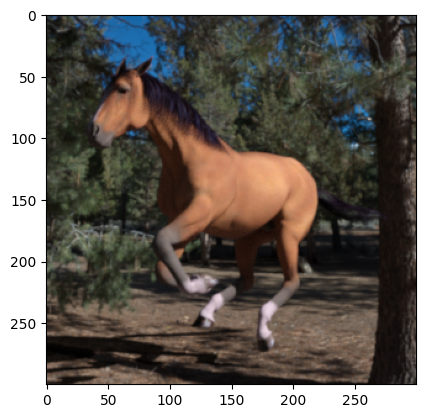

In [7]:
plt.imshow(load_img(os.path.join(train_horse, os.listdir(train_horse)[9])))
plt.show()

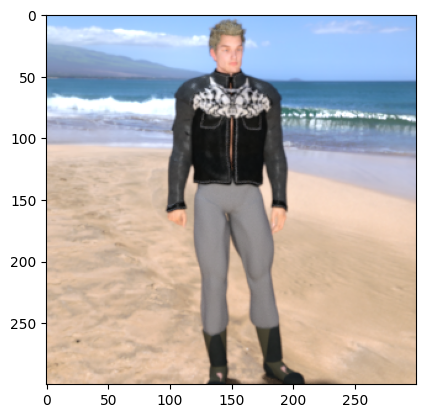

In [8]:
plt.imshow(load_img(os.path.join(train_humen, os.listdir(train_humen)[9])))
plt.show()

In [9]:
sample_img = load_img(os.path.join(train_horse, os.listdir(train_horse)[0]))
sample_array = img_to_array(sample_img)
sample_array.shape

(300, 300, 3)

In [10]:
def Augmentation(train_dir, val_dir):
  train_gen = ImageDataGenerator(rescale = 1./255.0,
    shear_range = 0.2,
    rotation_range = 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

  val_gen = ImageDataGenerator(rescale = 1./255.0)

  train_data = train_gen.flow_from_directory(train_dir,
    batch_size = 32,
    class_mode = "binary",
    target_size = (150,150))

  val_data = val_gen.flow_from_directory(val_dir,
    batch_size = 32,
    class_mode = "binary",
    target_size = (150,150))
  return train_data, val_data

In [11]:
train_data, val_data = Augmentation(train_dir, val_dir)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
from tensorflow.keras.applications import InceptionV3

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-08-04 15:52:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2023-08-04 15:52:01 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [14]:
weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [15]:
def my_model(weights):
  base_model = InceptionV3(weights = None, input_shape = (150,150,3), include_top=False)
  base_model.load_weights(weights)
  for layer in base_model.layers:
    layer.trainable = False
  return base_model

In [16]:
base_model = my_model(weights)

In [17]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get("accuracy") > 0.999):
      print("you get 99.99 % accuracy")
      self.model.stop_training = True

In [19]:
def last_layers(base_model):
  last_layer = base_model.get_layer("mixed7")
  print(last_layer.output_shape)
  last_output = last_layer.output
  print(last_output)
  return last_output

In [20]:
last_output = last_layers(base_model)

(None, 7, 7, 768)
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [27]:
def model(base_model,  last_output):
  x = tf.keras.layers.Flatten()(last_output)
  x = tf.keras.layers.Dense(1024, activation = "relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  output = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
  model = tf.keras.Model(inputs = base_model.input, outputs = output)
  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"])
  return model

In [28]:
model = model(base_model,  last_output)
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,512,481 total parameters in this model.
There are 38,537,217 trainable parameters in this model.


In [29]:
callbacks = myCallback()
history = model.fit(train_data, validation_data = val_data, epochs = 100, verbose=2, callbacks = callbacks)

Epoch 1/100
33/33 - 27s - loss: 0.1839 - accuracy: 0.9260 - val_loss: 0.0096 - val_accuracy: 1.0000 - 27s/epoch - 811ms/step
Epoch 2/100
33/33 - 12s - loss: 0.0332 - accuracy: 0.9873 - val_loss: 0.0372 - val_accuracy: 0.9844 - 12s/epoch - 363ms/step
Epoch 3/100
33/33 - 13s - loss: 0.0408 - accuracy: 0.9844 - val_loss: 0.0537 - val_accuracy: 0.9805 - 13s/epoch - 404ms/step
Epoch 4/100
33/33 - 12s - loss: 0.0179 - accuracy: 0.9912 - val_loss: 0.0670 - val_accuracy: 0.9727 - 12s/epoch - 374ms/step
Epoch 5/100
33/33 - 12s - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0293 - val_accuracy: 0.9844 - 12s/epoch - 370ms/step
Epoch 6/100
33/33 - 12s - loss: 0.0107 - accuracy: 0.9951 - val_loss: 0.0448 - val_accuracy: 0.9844 - 12s/epoch - 362ms/step
Epoch 7/100
33/33 - 12s - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0381 - val_accuracy: 0.9805 - 12s/epoch - 361ms/step
Epoch 8/100
you get 99.99 % accuracy
33/33 - 12s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9805 

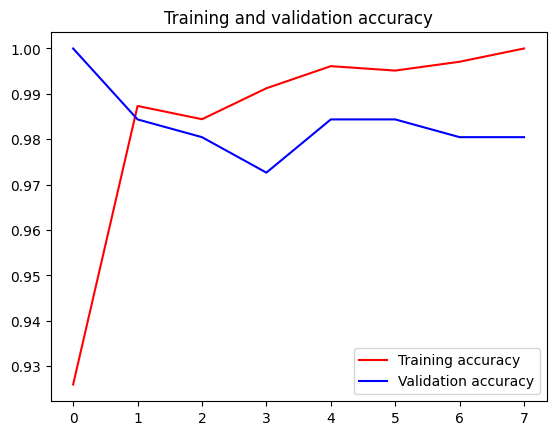

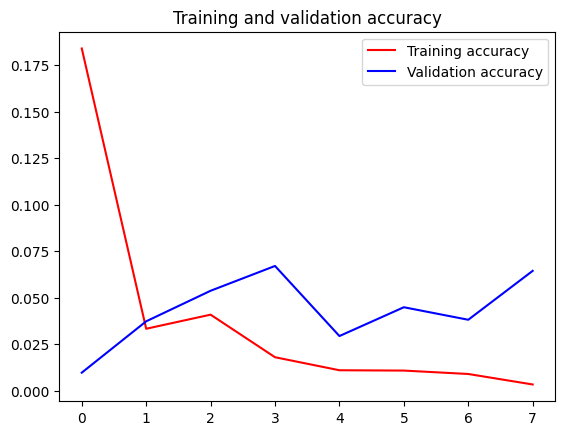

<Figure size 640x480 with 0 Axes>

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()